# ML - IE406 Project

Group Details

**Group - 21**

1. Kushagra Pathak - 201801005
2. Harsh Modi - 201801029
3. Parth Naghera-201801176
4. Harsh Patel - 201801411
5. Vatsal Agrawal-201801053





In [ ]:
!pip install pycountry

     |████████████████████████████████| 10.1 MB 35.3 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=ff69a5868e4b4578a2f7fc733702ccc04f9cf5dbf3155c5c7903843b3b3f45a2
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


In [ ]:
!pip install prophet

     |████████████████████████████████| 65 kB 4.1 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
     |████████████████████████████████| 214 kB 57.9 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640398 sha256=46c5cc5be21b26ab177922ce39c2c5c88a51ddcd06722d8834ebded3d807f360
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import numpy as np
from matplotlib.text import Annotation
from sklearn.preprocessing import scale
import matplotlib.image as mplib 
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from statsmodels.graphics.gofplots import qqplot
import sympy as sp
import warnings
import math
import random
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
import scipy.io 
import cv2 
import time
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy.sparse.linalg import svds
from sklearn.utils.extmath import svd_flip

import plotly.express as px

import pycountry

# prophet related
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics, cross_validation
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric

warnings.filterwarnings('ignore')

plt.style.use('seaborn')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pathConf = "/content/drive/Shareddrives/Intranet/Intranet/Sem-7/IE406 Machine Learning/time_series_covid19_confirmed_global.csv"
pathDeat = "/content/drive/Shareddrives/Intranet/Intranet/Sem-7/IE406 Machine Learning/time_series_covid19_deaths_global.csv"
pathReco = "/content/drive/Shareddrives/Intranet/Intranet/Sem-7/IE406 Machine Learning/time_series_covid19_recovered_global.csv"

In [ ]:
dataConfirmed = pd.read_csv(pathConf)
dataConfirmed.rename(columns={'Country/Region':'Country'}, inplace=True)

In [ ]:
dataDeath = pd.read_csv(pathDeat)
dataDeath.rename(columns={'Country/Region':'Country'}, inplace=True)

In [ ]:
dataRecovered = pd.read_csv(pathReco)
dataRecovered.rename(columns={'Country/Region':'Country'}, inplace=True)

In [ ]:
dataConfirmed.head()

Province/State      Country       Lat  ...  11/13/21  11/14/21  11/15/21
0            NaN  Afghanistan  33.93911  ...    156510    156552    156610
1            NaN      Albania  41.15330  ...    192600    193075    193269
2            NaN      Algeria  28.03390  ...    207873    207970    208104
3            NaN      Andorra  42.50630  ...     15819     15819     15907
4            NaN       Angola -11.20270  ...     64899     64913     64913

[5 rows x 668 columns]

In [ ]:
dataDeath.head()

Province/State      Country       Lat  ...  11/13/21  11/14/21  11/15/21
0            NaN  Afghanistan  33.93911  ...      7292      7293      7294
1            NaN      Albania  41.15330  ...      2986      2990      2997
2            NaN      Algeria  28.03390  ...      5977      5984      5991
3            NaN      Andorra  42.50630  ...       130       130       130
4            NaN       Angola -11.20270  ...      1727      1727      1727

[5 rows x 668 columns]

In [ ]:
dataRecovered.head()

Province/State      Country       Lat  ...  11/13/21  11/14/21  11/15/21
0            NaN  Afghanistan  33.93911  ...         0         0         0
1            NaN      Albania  41.15330  ...         0         0         0
2            NaN      Algeria  28.03390  ...         0         0         0
3            NaN      Andorra  42.50630  ...         0         0         0
4            NaN       Angola -11.20270  ...         0         0         0

[5 rows x 668 columns]

## India specific data

In [ ]:
dataConfirmed[dataConfirmed['Country']=='India']

Province/State Country        Lat  ...  11/13/21  11/14/21  11/15/21
147            NaN   India  20.593684  ...  34437307  34447536  34456401

[1 rows x 668 columns]

In [ ]:
dataRecovered[dataRecovered['Country']=='India']

Province/State Country        Lat  ...  11/13/21  11/14/21  11/15/21
132            NaN   India  20.593684  ...         0         0         0

[1 rows x 668 columns]

In [ ]:
dataDeath[dataDeath['Country']=='India']

Province/State Country        Lat  ...  11/13/21  11/14/21  11/15/21
147            NaN   India  20.593684  ...    463530    463655    463852

[1 rows x 668 columns]

## Worldwide COVID data in timeseries format

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/Intranet/Intranet/Sem-7/IE406 Machine Learning/covid_19_combined.csv', parse_dates=['ObservationDate'])

In [ ]:
data.columns

Index(['ObservationDate', 'Province/State', 'Country', 'Lat', 'Long',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [ ]:
data.head()

ObservationDate Province/State      Country  ...  Confirmed  Deaths  Recovered
0      2020-01-22            NaN  Afghanistan  ...          0       0          0
1      2020-01-23            NaN  Afghanistan  ...          0       0          0
2      2020-01-24            NaN  Afghanistan  ...          0       0          0
3      2020-01-25            NaN  Afghanistan  ...          0       0          0
4      2020-01-26            NaN  Afghanistan  ...          0       0          0

[5 rows x 8 columns]

In [ ]:
data.tail()

ObservationDate Province/State   Country  ...  Confirmed  Deaths  Recovered
171971      2021-11-11            NaN  Zimbabwe  ...     133329    4694          0
171972      2021-11-12            NaN  Zimbabwe  ...     133329    4694          0
171973      2021-11-13            NaN  Zimbabwe  ...     133393    4696          0
171974      2021-11-14            NaN  Zimbabwe  ...     133428    4696          0
171975      2021-11-15            NaN  Zimbabwe  ...     133438    4697          0

[5 rows x 8 columns]

## India specifc COVID data in timeseris format

In [ ]:
# India specific data
dataIndia = data.loc[data['Country'] == 'India'].groupby("ObservationDate")[['Confirmed', 'Deaths', 'Recovered']].sum()
dataIndia

Confirmed  Deaths  Recovered
ObservationDate                              
2020-01-22               0       0          0
2020-01-23               0       0          0
2020-01-24               0       0          0
2020-01-25               0       0          0
2020-01-26               0       0          0
...                    ...     ...        ...
2021-11-11        34414186  462690          0
2021-11-12        34426036  463245          0
2021-11-13        34437307  463530          0
2021-11-14        34447536  463655          0
2021-11-15        34456401  463852          0

[664 rows x 3 columns]

In [ ]:
dataIndia[pd.to_datetime(dataIndia.index) <= pd.to_datetime('2021-06-30')]

Confirmed  Deaths  Recovered
ObservationDate                              
2020-01-22               0       0          0
2020-01-23               0       0          0
2020-01-24               0       0          0
2020-01-25               0       0          0
2020-01-26               0       0          0
...                    ...     ...        ...
2021-06-26        30233183  395751   29251029
2021-06-27        30279331  396730   29309607
2021-06-28        30316897  397637   29366601
2021-06-29        30362848  398454   29427330
2021-06-30        30411634  399459   29488918

[526 rows x 3 columns]

## Time series plot of worldwise cases - confirmed, deaths and recovered

In [ ]:
# Time series plot of worldwise cases - confirmed, deaths and recovered
confirmedCases = data.groupby('ObservationDate').sum()['Confirmed']
deathCases = data.groupby('ObservationDate').sum()['Deaths']
recoveredCases = data.groupby('ObservationDate').sum()['Recovered']


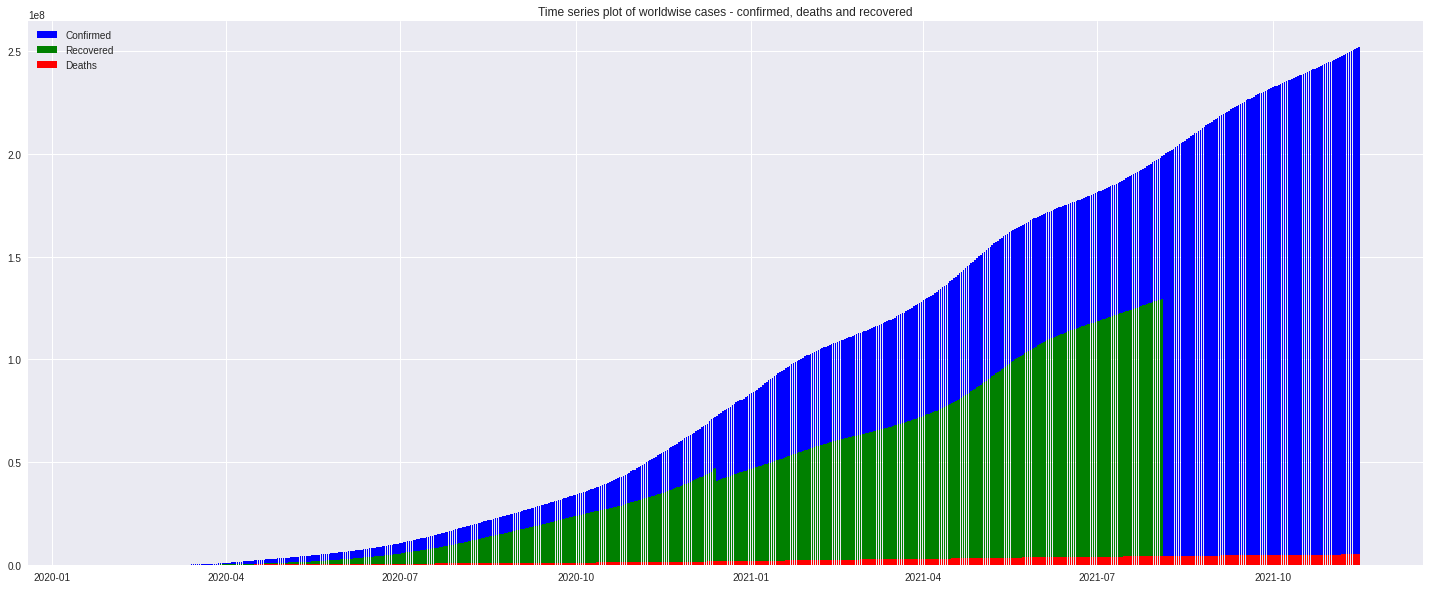

In [ ]:
plt.figure(figsize=(25,10))
plt.bar(x=confirmedCases.index, height=confirmedCases.values, color='blue', label='Confirmed')

plt.bar(x=recoveredCases.index, height=recoveredCases.values, color='green', label='Recovered')
plt.bar(x=deathCases.index, height=deathCases.values, color='red', label='Deaths')


# plt.xticks(recoveredCases.index, rotation='vertical')
plt.title('Time series plot of worldwise cases - confirmed, deaths and recovered')
plt.legend()
plt.savefig('worldwidecases_barplot.png', bbox_inches='tight')
plt.show()

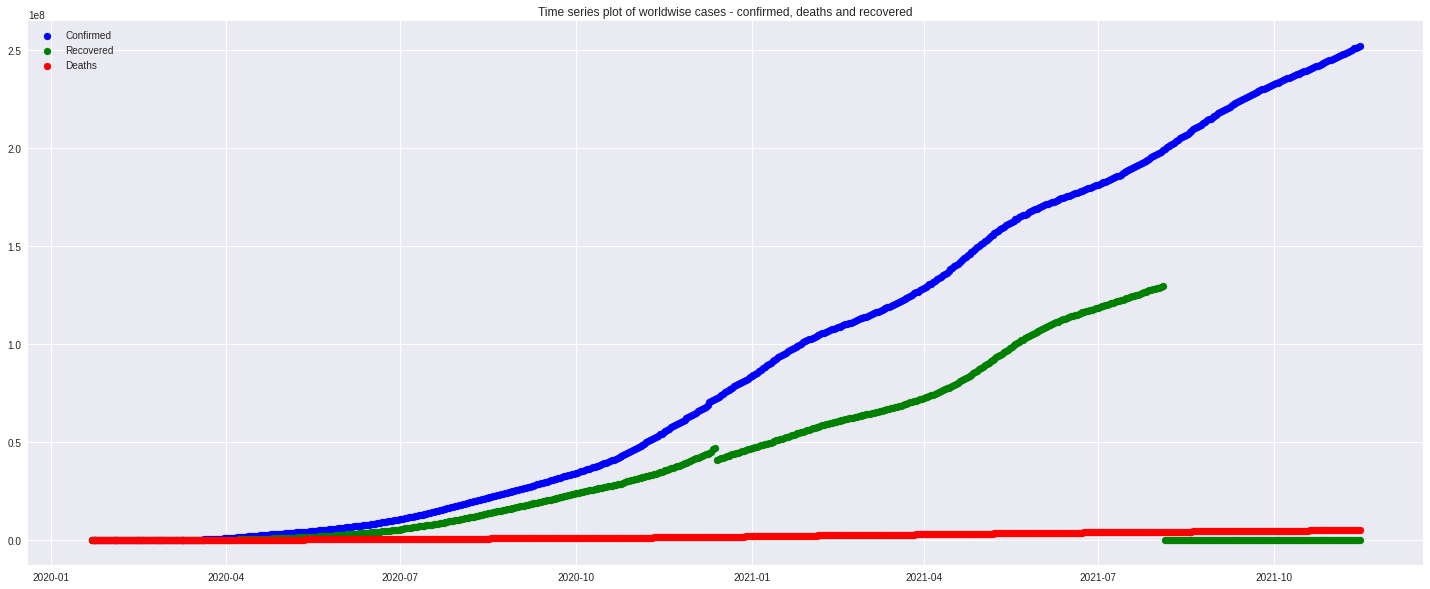

In [ ]:
plt.figure(figsize=(25,10))
plt.scatter(x=confirmedCases.index, y=confirmedCases.values, color='blue', label='Confirmed')

plt.scatter(x=recoveredCases.index, y=recoveredCases.values, color='green', label='Recovered')

plt.scatter(x=deathCases.index, y=deathCases.values, color='red', label='Deaths')

# plt.xticks(recoveredCases.index, rotation='vertical')
plt.title('Time series plot of worldwise cases - confirmed, deaths and recovered')
plt.legend()
plt.savefig('worldwidecases_scatter.png', bbox_inches='tight')

plt.show()


## Time series plot of India cases - confirmed, deaths and recovered

In [ ]:
# Time series plot of Inida cases - confirmed, deaths and recovered
confirmedCasesIndia = dataIndia.groupby('ObservationDate').sum()['Confirmed']
deathCasesIndia = dataIndia.groupby('ObservationDate').sum()['Deaths']
recoveredCasesIndia = dataIndia.groupby('ObservationDate').sum()['Recovered']

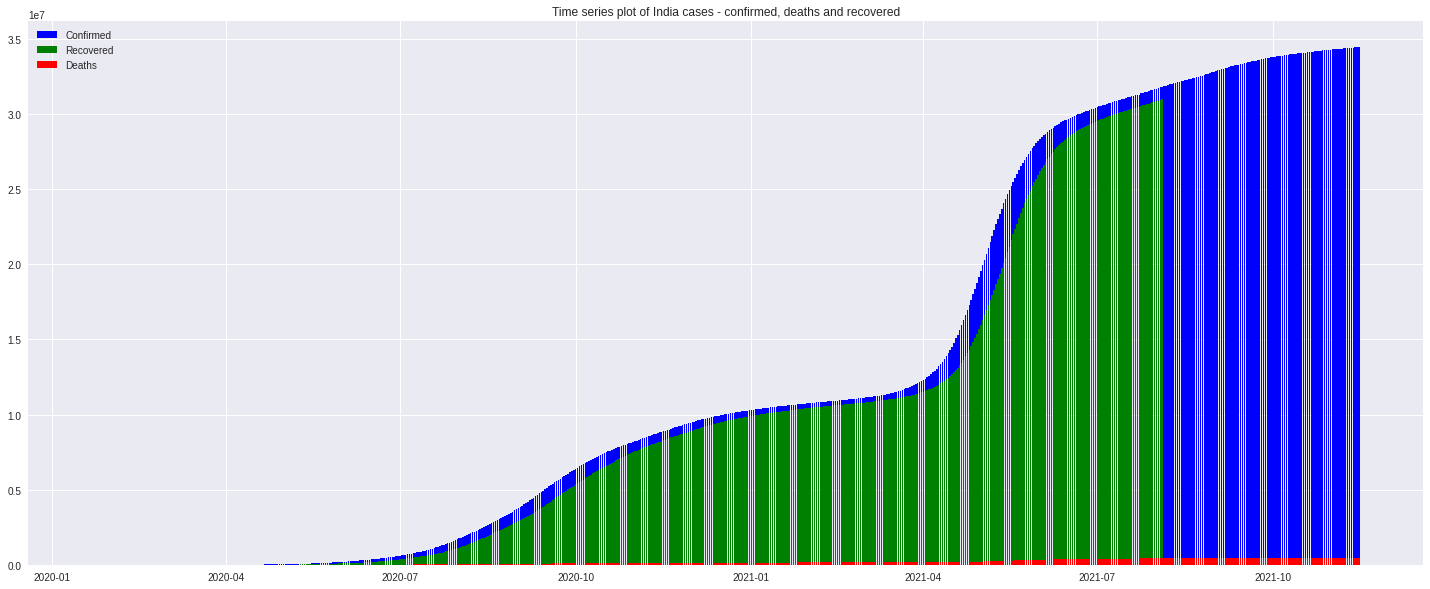

In [ ]:
plt.figure(figsize=(25,10))

plt.bar(x=confirmedCasesIndia.index, height=confirmedCasesIndia.values, color='blue', label='Confirmed')
plt.bar(x=recoveredCasesIndia.index, height=recoveredCasesIndia.values, color='green', label='Recovered')
plt.bar(x=deathCasesIndia.index, height=deathCasesIndia.values, color='red', label='Deaths')

plt.title('Time series plot of India cases - confirmed, deaths and recovered')
plt.legend()
plt.savefig('Indiacases_barplot.png', bbox_inches='tight')
plt.show()


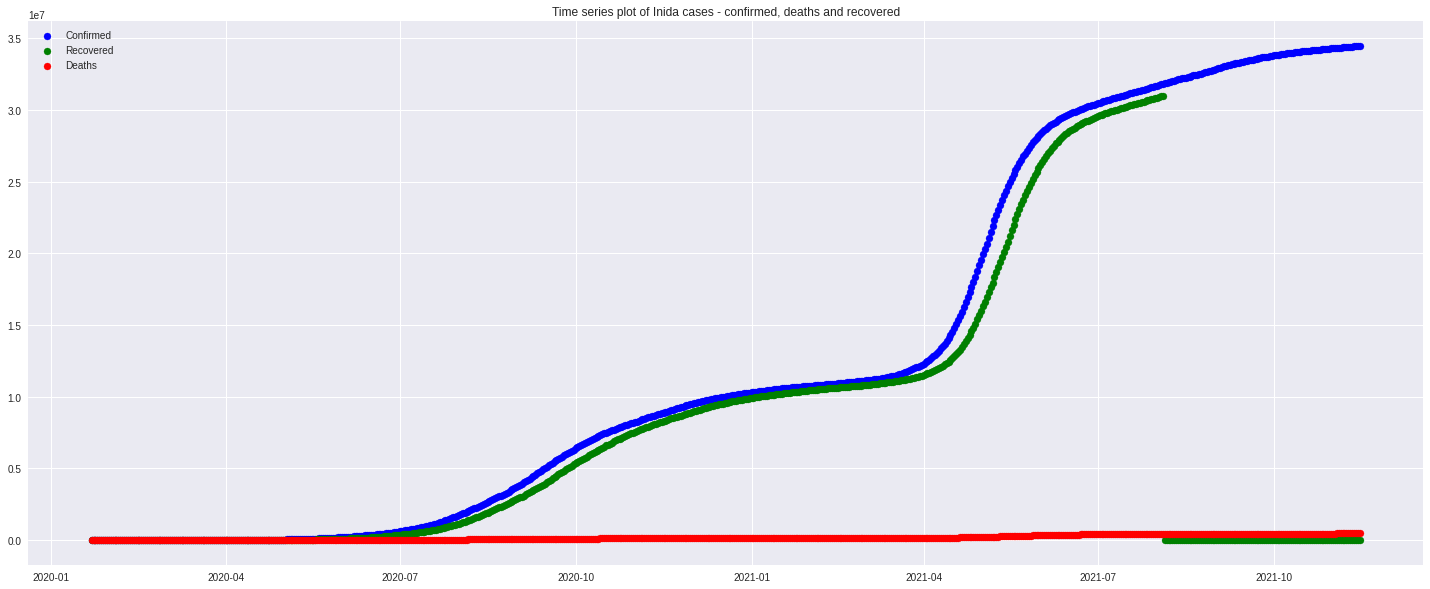

In [ ]:
plt.figure(figsize=(25,10))

plt.scatter(x=confirmedCasesIndia.index, y=confirmedCasesIndia.values, color='blue', label='Confirmed')
plt.scatter(x=recoveredCasesIndia.index, y=recoveredCasesIndia.values, color='green', label='Recovered')
plt.scatter(x=deathCasesIndia.index, y=deathCasesIndia.values, color='red', label='Deaths')

plt.title('Time series plot of Inida cases - confirmed, deaths and recovered')
plt.legend()
plt.savefig('Indiacases_scatterplot.png', bbox_inches='tight')

plt.show()


## Worlwide cases timeseries view

In [ ]:
# dataConfirmed[["Province/State","Lat","Long","Country"]]

# data12 = data
# data12['Country'].replace({'Mainland China': 'China'}, inplace=True)
# # data12['ObservationDate'] = str(data12['ObservationDate'])

# dataWorldMap = pd.merge(data12, dataConfirmed[["Province/State","Lat","Long","Country"]], on=['Country', 'Province/State', "Lat","Long"])

# fig = px.density_mapbox(dataWorldMap, lat='Lat', lon='Long', hover_name="Province/State", hover_data=["Confirmed","Deaths","Recovered"], 
#                   animation_frame="ObservationDate",radius=7, zoom=0, height=700)

# fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# fig.show()

In [ ]:
data2 = data.drop(['Province/State'], axis=1).groupby(["ObservationDate", "Country"])[['ObservationDate', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()


In [ ]:
data2.tail()

ObservationDate             Country  Confirmed  Deaths  Recovered
127483      2021-11-15             Vietnam    1035138   23183          0
127484      2021-11-15  West Bank and Gaza     457154    4754          0
127485      2021-11-15               Yemen       9936    1926          0
127486      2021-11-15              Zambia     209996    3666          0
127487      2021-11-15            Zimbabwe     133438    4697          0

In [ ]:
data2['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guin

In [ ]:
confirmedRecords = data2.groupby(['ObservationDate', 'Country']).sum()[['Confirmed']].reset_index()
deathsRecords = data2.groupby(['ObservationDate', 'Country']).sum()[['Deaths']].reset_index()
recoveredRecords = data2.groupby(['ObservationDate', 'Country']).sum()[['Recovered']].reset_index()

In [ ]:
firstDate = confirmedRecords['ObservationDate'].min()
firstDate

Timestamp('2020-01-22 00:00:00')

In [ ]:
lastDate = confirmedRecords['ObservationDate'].max()
lastDate

Timestamp('2021-11-15 00:00:00')

In [ ]:
confirmedRecords = confirmedRecords[confirmedRecords['ObservationDate']==lastDate][['Country','Confirmed']]
deathsRecords = deathsRecords[(deathsRecords['ObservationDate']==lastDate)][['Country','Deaths']]
recoveredRecords = recoveredRecords[['Country','Recovered']]

In [ ]:
countriesInRecords = confirmedRecords['Country'].unique()
print("Number of Countries/Regions with Covid Detected: " + str(len(countriesInRecords)))
print("Countries/Regions with cases: ")
for i in countriesInRecords:
  print("     " + str(i))

Number of Countries/Regions with Covid Detected: 192
Countries/Regions with cases: 
     Afghanistan
     Albania
     Algeria
     Andorra
     Angola
     Antigua and Barbuda
     Argentina
     Armenia
     Australia
     Austria
     Azerbaijan
     Bahamas
     Bahrain
     Bangladesh
     Barbados
     Belarus
     Belgium
     Belize
     Benin
     Bhutan
     Bolivia
     Bosnia and Herzegovina
     Botswana
     Brazil
     Brunei
     Bulgaria
     Burkina Faso
     Burma
     Burundi
     Cabo Verde
     Cambodia
     Cameroon
     Central African Republic
     Chad
     Chile
     China
     Colombia
     Comoros
     Congo (Brazzaville)
     Congo (Kinshasa)
     Costa Rica
     Cote d'Ivoire
     Croatia
     Cuba
     Cyprus
     Czechia
     Denmark
     Diamond Princess
     Djibouti
     Dominica
     Dominican Republic
     Ecuador
     Egypt
     El Salvador
     Equatorial Guinea
     Eritrea
     Estonia
     Eswatini
     Ethiopia
     Fiji
     Finland
     Fra

In [ ]:
print(list(country.name for country in pycountry.countries))

['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Åland Islands', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antarctica', 'French Southern Territories', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Bonaire, Sint Eustatius and Saba', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina', 'Saint Barthélemy', 'Belarus', 'Belize', 'Bermuda', 'Bolivia, Plurinational State of', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan', 'Bouvet Island', 'Botswana', 'Central African Republic', 'Canada', 'Cocos (Keeling) Islands', 'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Congo, The Democratic Republic of the', 'Congo', 'Cook Islands', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Christmas Island', 'Cayman Islands', 'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egy

In [ ]:
print('UK' in list(country.name for country in pycountry.countries))
print('United Kingdom' in list(country.name for country in pycountry.countries))

False
True


In [ ]:
confirmedRecords2 = confirmedRecords.copy()
deathsRecords2 = deathsRecords.copy()
recoveredRecords2 = recoveredRecords.copy()
dataWorldBuublePlot = [confirmedRecords2,deathsRecords2,recoveredRecords2]
for dataw in dataWorldBuublePlot:
  dataw["Country"].replace({'Mainland China': 'China'}, inplace=True)
  dataw["Country"].replace({'UK': 'United Kingdom'}, inplace=True)
  dataw["Country"].replace({'US': 'United States'}, inplace=True)

In [ ]:
countriesTemp = {}
for country in pycountry.countries:
  countriesTemp[country.name] = country.alpha_3

confirmedRecords2['iso_alpha'] = confirmedRecords2['Country'].map(countriesTemp.get)
deathsRecords2["iso_alpha"] = deathsRecords2["Country"].map(countriesTemp.get)
recoveredRecords2["iso_alpha"] = recoveredRecords2["Country"].map(countriesTemp.get)

In [ ]:
dataBubbleConfirmed = confirmedRecords2[["iso_alpha","Confirmed", "Country"]]
dataBubbleDeaths = deathsRecords2[["iso_alpha","Deaths"]]
dataBubbleRecovered = recoveredRecords2[["iso_alpha","Recovered"]]

In [ ]:
recoveredRecords

Country  Recovered
0              Afghanistan          0
1                  Albania          0
2                  Algeria          0
3                  Andorra          0
4                   Angola          0
...                    ...        ...
127483             Vietnam          0
127484  West Bank and Gaza          0
127485               Yemen          0
127486              Zambia          0
127487            Zimbabwe          0

[127488 rows x 2 columns]

In [ ]:
fig = px.scatter_geo(dataBubbleConfirmed, locations="iso_alpha", color="Country",
                     hover_name="iso_alpha", size="Confirmed",
                     projection="natural earth", title = 'Worldwide Confirmed Cases')
fig.show()

In [ ]:
fig = px.scatter_geo(dataBubbleDeaths, locations="iso_alpha", color="Deaths",
                     hover_name="iso_alpha", size="Deaths",
                     projection="natural earth", title="Worldwide Death Cases")
fig.show()

In [ ]:
fig = px.scatter_geo(dataBubbleRecovered, locations="iso_alpha", color="Recovered",
                     hover_name="iso_alpha", size="Recovered",
                     projection="natural earth", title="Worldwide Recovered Cases")
fig.show()

# Forecasting with Prophet


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true-y_pred)/y_true) * 100

In [ ]:
confirmedCases = data.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deathCases = data.groupby('ObservationDate').sum()['Deaths'].reset_index()
recoveredCases = data.groupby('ObservationDate').sum()['Recovered'].reset_index()

confirmedCasesIndia = dataIndia.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deathCasesIndia = dataIndia.groupby('ObservationDate').sum()['Deaths'].reset_index()
recoveredCasesIndia = dataIndia.groupby('ObservationDate').sum()['Recovered'].reset_index()

## Predict confirmed cases: Worldwide

In [ ]:
confirmedCases.head()

ObservationDate  Confirmed
0      2020-01-22        551
1      2020-01-23        649
2      2020-01-24        930
3      2020-01-25       1394
4      2020-01-26       2021

In [ ]:
confirmedCases.columns = ['ds', 'y']
confirmedCases['ds'] = pd.to_datetime(confirmedCases['ds'])
confirmedCases.head()

ds     y
0 2020-01-22   551
1 2020-01-23   649
2 2020-01-24   930
3 2020-01-25  1394
4 2020-01-26  2021

In [ ]:
confirmedCasesModel = Prophet() # instantiate model object

confirmedCasesModel.add_country_holidays(country_name='IN')

confirmedCasesModel.fit(confirmedCases) # fit training data

future = confirmedCasesModel.make_future_dataframe(periods=365) # make future predictions

futureConfirmed = future.copy() 

future.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
1024 2022-11-11
1025 2022-11-12
1026 2022-11-13
1027 2022-11-14
1028 2022-11-15

In [ ]:
confirmedCasesModel.train_holiday_names

0                        Republic Day
1                    Independence Day
2                      Gandhi Jayanti
3                              Diwali
4                                Holi
5                       Day of Ashura
6                              Mawlid
7                         Eid al-Fitr
8                      New Year's Day
9                         Palm Sunday
10                    Maundy Thursday
11                        Good Friday
12                      Easter Sunday
13                 Feast of Pentecost
14    Fest of St. Theresa of Calcutta
15        Feast of the Blessed Virgin
16                     All Saints Day
17                      All Souls Day
18                      Christmas Day
19                         Boxing Day
20               Feast of Holy Family
21             Feast of the Sacrifice
dtype: object

In [ ]:
forecast = confirmedCasesModel.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1024 2022-11-11  4.483438e+08  3.492841e+08  5.469721e+08
1025 2022-11-12  4.488464e+08  3.492600e+08  5.471188e+08
1026 2022-11-13  4.493133e+08  3.480582e+08  5.476990e+08
1027 2022-11-14  4.498277e+08  3.490913e+08  5.489702e+08
1028 2022-11-15  4.503897e+08  3.488639e+08  5.495039e+08

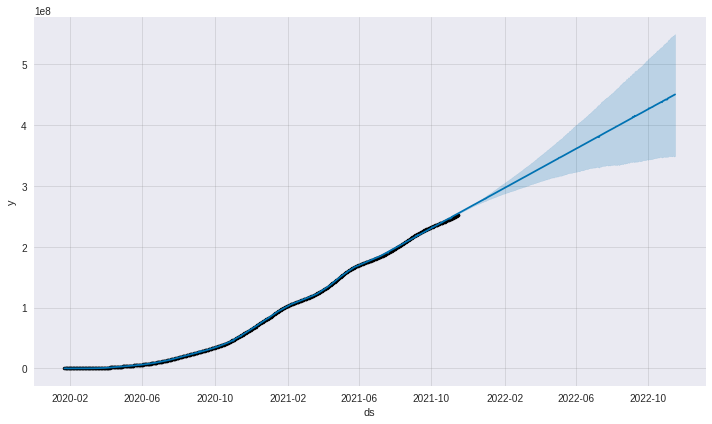

In [ ]:
confirmedForecastPlot = confirmedCasesModel.plot(forecast)

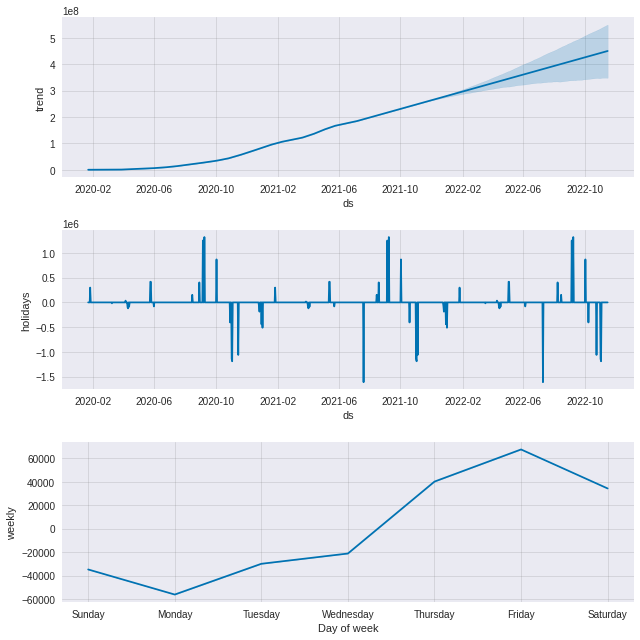

In [ ]:
forecastComponents = confirmedCasesModel.plot_components(forecast)

In [ ]:
plot_plotly(confirmedCasesModel, forecast)

In [ ]:
plot_components_plotly(confirmedCasesModel, forecast)

In [ ]:
df_cv_confirmed_cases = cross_validation(confirmedCasesModel, initial  = '365 days', period = '7 days', horizon = '180 days')

INFO:fbprophet:Making 17 forecasts with cutoffs between 2021-01-27 00:00:00 and 2021-05-19 00:00:00


  0%|          | 0/17 [00:00<?, ?it/s]

In [ ]:
df_p = performance_metrics(df_cv_confirmed_cases)
df_p.tail()

horizon           mse          rmse  ...      mape     mdape  coverage
158 176 days  2.154839e+14  1.467937e+07  ...  0.061814  0.069582  0.718954
159 177 days  2.163488e+14  1.470880e+07  ...  0.061792  0.069582  0.728758
160 178 days  2.171174e+14  1.473491e+07  ...  0.061757  0.069582  0.738562
161 179 days  2.178160e+14  1.475859e+07  ...  0.061715  0.069582  0.748366
162 180 days  2.183674e+14  1.477726e+07  ...  0.061645  0.069582  0.751634

[5 rows x 7 columns]

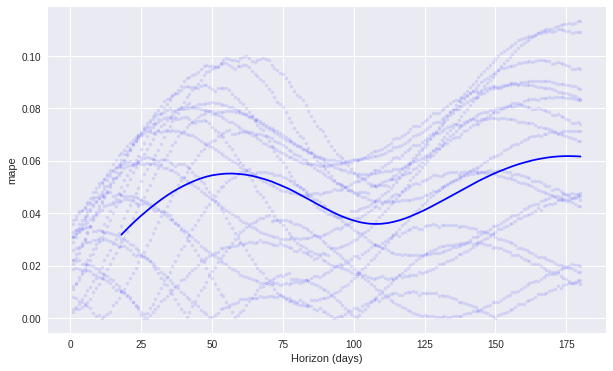

In [ ]:
fig = plot_cross_validation_metric(df_cv_confirmed_cases, metric='mape')

In [ ]:
MAPE_confirmed_cases = mean_absolute_percentage_error(df_cv_confirmed_cases.y, df_cv_confirmed_cases.yhat)
MAPE_confirmed_cases

4.799115049459552

## Predict confirmed cases: India

In [ ]:
confirmedCasesIndia.head()

ObservationDate  Confirmed
0      2020-01-22          0
1      2020-01-23          0
2      2020-01-24          0
3      2020-01-25          0
4      2020-01-26          0

In [ ]:
confirmedCasesIndia.columns = ['ds', 'y']
confirmedCasesIndia['ds'] = pd.to_datetime(confirmedCasesIndia['ds'])
confirmedCasesIndia.head()

ds  y
0 2020-01-22  0
1 2020-01-23  0
2 2020-01-24  0
3 2020-01-25  0
4 2020-01-26  0

In [ ]:
confirmedCasesIndiaModel = Prophet() # instantiate model object

confirmedCasesIndiaModel.add_country_holidays(country_name='IN')

confirmedCasesIndiaModel.fit(confirmedCasesIndia) # fit training data

future = confirmedCasesIndiaModel.make_future_dataframe(periods=180) # make future predictions

futureConfirmed = future.copy() 

future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
839 2022-05-10
840 2022-05-11
841 2022-05-12
842 2022-05-13
843 2022-05-14

In [ ]:
confirmedCasesIndiaModel.train_holiday_names

0                        Republic Day
1                    Independence Day
2                      Gandhi Jayanti
3                              Diwali
4                                Holi
5                       Day of Ashura
6                              Mawlid
7                         Eid al-Fitr
8                      New Year's Day
9                         Palm Sunday
10                    Maundy Thursday
11                        Good Friday
12                      Easter Sunday
13                 Feast of Pentecost
14    Fest of St. Theresa of Calcutta
15        Feast of the Blessed Virgin
16                     All Saints Day
17                      All Souls Day
18                      Christmas Day
19                         Boxing Day
20               Feast of Holy Family
21             Feast of the Sacrifice
dtype: object

In [ ]:
forecast = confirmedCasesIndiaModel.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
839 2022-05-10  4.034266e+07  2.655005e+07  5.254266e+07
840 2022-05-11  4.037287e+07  2.637628e+07  5.267612e+07
841 2022-05-12  4.040665e+07  2.626985e+07  5.278360e+07
842 2022-05-13  4.043550e+07  2.611012e+07  5.294561e+07
843 2022-05-14  4.046928e+07  2.598527e+07  5.322739e+07

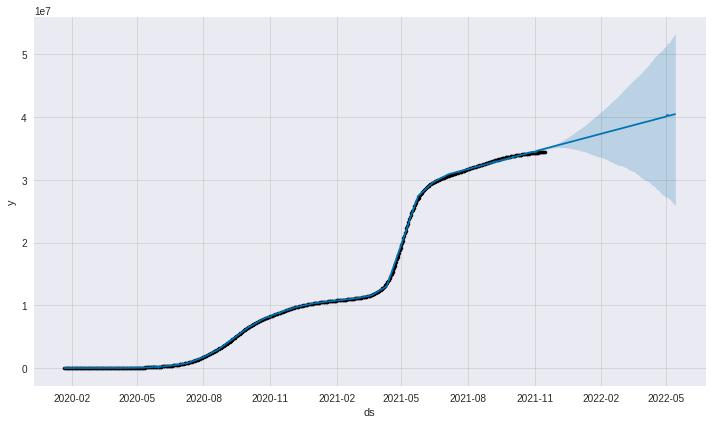

In [ ]:
confirmedIndiaForecastPlot = confirmedCasesIndiaModel.plot(forecast)

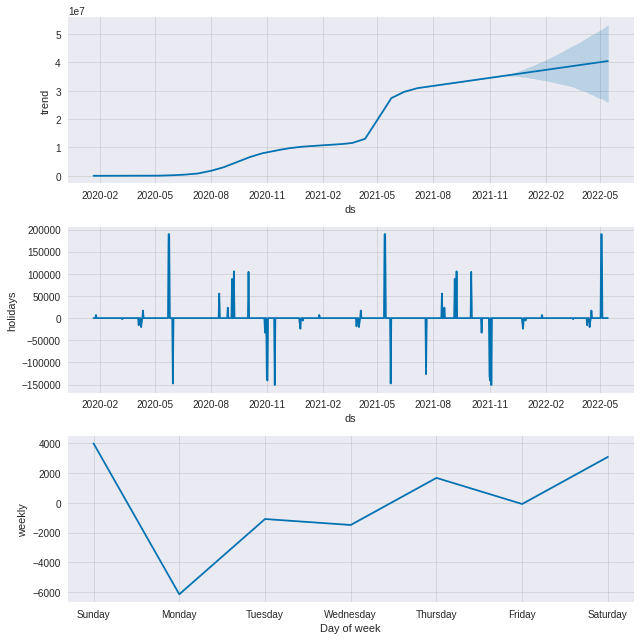

In [ ]:
forecastComponents = confirmedCasesIndiaModel.plot_components(forecast)

In [ ]:
plot_plotly(confirmedCasesIndiaModel, forecast)

In [ ]:
plot_components_plotly(confirmedCasesIndiaModel, forecast)

In [ ]:
df_cv_confirmed_cases_India = cross_validation(confirmedCasesIndiaModel, initial  = '90 days', period = '7 days', horizon = '30 days')

INFO:fbprophet:Making 78 forecasts with cutoffs between 2020-04-25 00:00:00 and 2021-10-16 00:00:00


  0%|          | 0/78 [00:00<?, ?it/s]

In [ ]:
df_p = performance_metrics(df_cv_confirmed_cases_India)
df_p.tail()

horizon           mse          rmse  ...      mape     mdape  coverage
23 26 days  1.547743e+13  3.934136e+06  ...  0.190766  0.140517  0.034188
24 27 days  1.614333e+13  4.017877e+06  ...  0.195423  0.143856  0.029915
25 28 days  1.684154e+13  4.103845e+06  ...  0.200117  0.148258  0.025641
26 29 days  1.757057e+13  4.191727e+06  ...  0.204904  0.152284  0.025641
27 30 days  1.831278e+13  4.279344e+06  ...  0.209453  0.156413  0.029915

[5 rows x 7 columns]

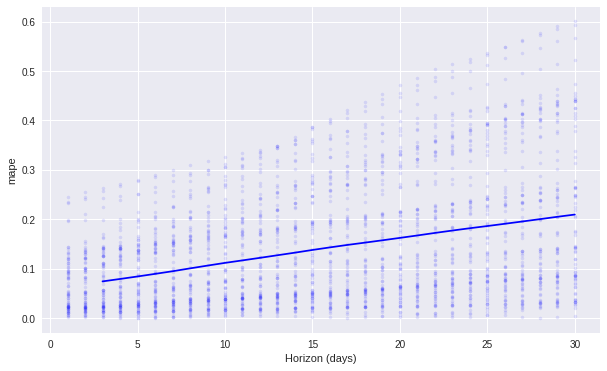

In [ ]:
fig = plot_cross_validation_metric(df_cv_confirmed_cases_India, metric='mape')

In [ ]:
MAPE_confirmed_cases_India = mean_absolute_percentage_error(df_cv_confirmed_cases_India.y, df_cv_confirmed_cases_India.yhat)
MAPE_confirmed_cases_India

14.353629067626192

## Deaths

In [ ]:
deathCases.head()

ObservationDate  Deaths
0      2020-01-22      17
1      2020-01-23      17
2      2020-01-24      25
3      2020-01-25      41
4      2020-01-26      54

In [ ]:
deathCases.columns = ['ds', 'y']
deathCases['ds'] = pd.to_datetime(deathCases['ds'])
deathCases.head()

ds   y
0 2020-01-22  17
1 2020-01-23  17
2 2020-01-24  25
3 2020-01-25  41
4 2020-01-26  54

In [ ]:
deathCasesModel = Prophet() # instantiate model object

deathCasesModel.add_country_holidays(country_name='IN')

deathCasesModel.fit(deathCases) # fit training data

future = deathCasesModel.make_future_dataframe(periods=365) # make future predictions

futureConfirmed = future.copy() 

future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
1024 2022-11-11
1025 2022-11-12
1026 2022-11-13
1027 2022-11-14
1028 2022-11-15

In [ ]:
deathCasesModel.train_holiday_names

0                        Republic Day
1                    Independence Day
2                      Gandhi Jayanti
3                              Diwali
4                                Holi
5                       Day of Ashura
6                              Mawlid
7                         Eid al-Fitr
8                      New Year's Day
9                         Palm Sunday
10                    Maundy Thursday
11                        Good Friday
12                      Easter Sunday
13                 Feast of Pentecost
14    Fest of St. Theresa of Calcutta
15        Feast of the Blessed Virgin
16                     All Saints Day
17                      All Souls Day
18                      Christmas Day
19                         Boxing Day
20               Feast of Holy Family
21             Feast of the Sacrifice
dtype: object

In [ ]:
forecast = deathCasesModel.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1024 2022-11-11  8.230245e+06  6.483985e+06  9.922991e+06
1025 2022-11-12  8.238049e+06  6.483040e+06  9.945467e+06
1026 2022-11-13  8.244809e+06  6.485914e+06  9.951342e+06
1027 2022-11-14  8.252195e+06  6.490898e+06  9.974518e+06
1028 2022-11-15  8.262287e+06  6.497810e+06  9.977218e+06

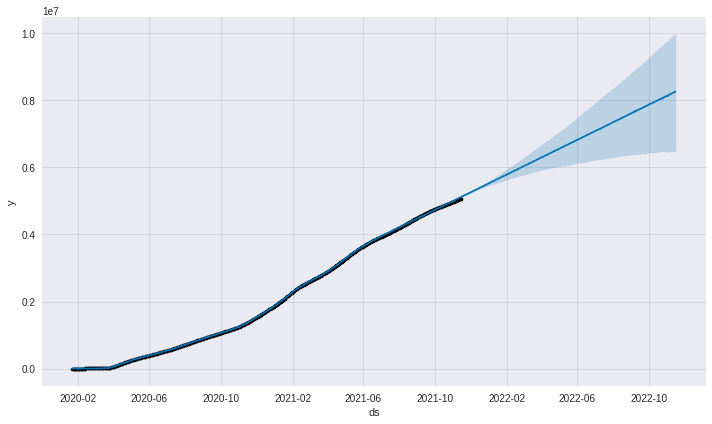

In [ ]:
deathCasesForecastPlot = deathCasesModel.plot(forecast)

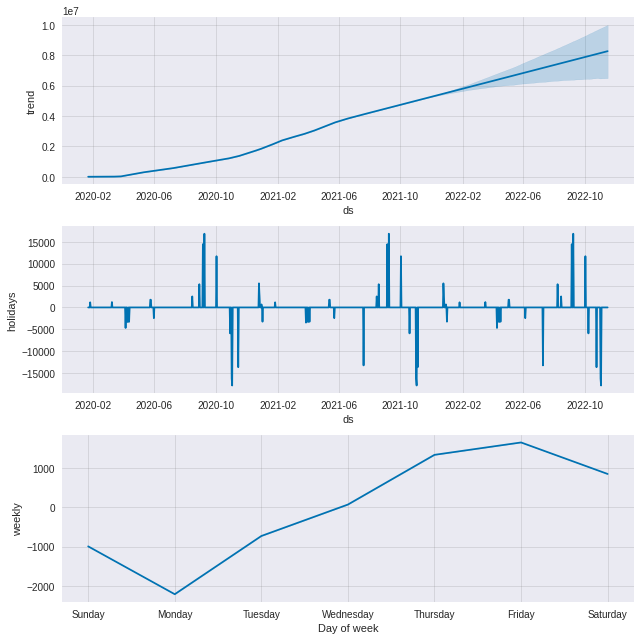

In [ ]:
forecastComponents = deathCasesModel.plot_components(forecast)

In [ ]:
plot_plotly(deathCasesModel, forecast)

In [ ]:
plot_components_plotly(deathCasesModel, forecast)

In [ ]:
df_cv_deaths = cross_validation(deathCasesModel, initial  = '365 days', period = '7 days', horizon = '180 days')

INFO:fbprophet:Making 17 forecasts with cutoffs between 2021-01-27 00:00:00 and 2021-05-19 00:00:00


  0%|          | 0/17 [00:00<?, ?it/s]

In [ ]:
df_p = performance_metrics(df_cv_deaths)
df_p.tail()

horizon           mse           rmse  ...      mape     mdape  coverage
158 176 days  6.426697e+10  253509.303173  ...  0.052302  0.049780  0.934641
159 177 days  6.566522e+10  256252.251753  ...  0.052859  0.050425  0.931373
160 178 days  6.711778e+10  259070.993260  ...  0.053431  0.050966  0.931373
161 179 days  6.860528e+10  261926.092187  ...  0.054009  0.051577  0.931373
162 180 days  7.010316e+10  264770.013194  ...  0.054586  0.052432  0.931373

[5 rows x 7 columns]

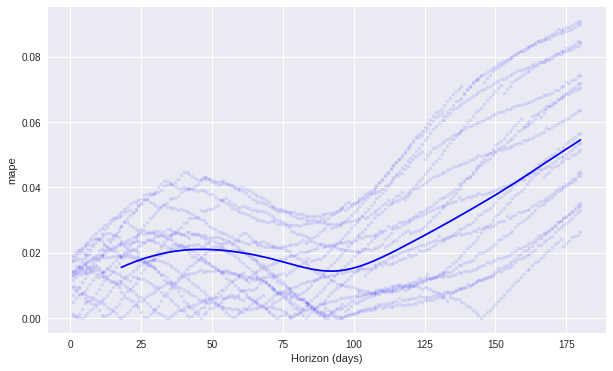

In [ ]:
fig = plot_cross_validation_metric(df_cv_deaths, metric='mape')

In [ ]:
MAPE_deaths = mean_absolute_percentage_error(df_cv_deaths.y, df_cv_deaths.yhat)
MAPE_deaths

2.6620154487265055

## Recovered cases

In [ ]:
recoveredCases.head()

ObservationDate  Recovered
0      2020-01-22         30
1      2020-01-23         32
2      2020-01-24         39
3      2020-01-25         42
4      2020-01-26         56

In [ ]:
recoveredCases.columns = ['ds', 'y']
recoveredCases['ds'] = pd.to_datetime(recoveredCases['ds'])
recoveredCases.head()

ds   y
0 2020-01-22  30
1 2020-01-23  32
2 2020-01-24  39
3 2020-01-25  42
4 2020-01-26  56

In [ ]:
mask = recoveredCases['ds'] <= pd.to_datetime('2021-06-30')
recoveredCases = recoveredCases.loc[mask]

In [ ]:
recoveredCases.tail()

ds          y
521 2021-06-26  116932006
522 2021-06-27  117189736
523 2021-06-28  117514943
524 2021-06-29  117807240
525 2021-06-30  118087142

In [ ]:
recoveredCasesModel = Prophet() # instantiate model object

recoveredCasesModel.add_country_holidays(country_name='IN')

recoveredCasesModel.fit(recoveredCases) # fit training data

future = recoveredCasesModel.make_future_dataframe(periods=365) # make future predictions

futureConfirmed = future.copy() 

future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
886 2022-06-26
887 2022-06-27
888 2022-06-28
889 2022-06-29
890 2022-06-30

In [ ]:
recoveredCasesModel.train_holiday_names

0                        Republic Day
1                    Independence Day
2                      Gandhi Jayanti
3                              Diwali
4                                Holi
5                       Day of Ashura
6                              Mawlid
7                         Eid al-Fitr
8                      New Year's Day
9                         Palm Sunday
10                    Maundy Thursday
11                        Good Friday
12                      Easter Sunday
13                 Feast of Pentecost
14    Fest of St. Theresa of Calcutta
15        Feast of the Blessed Virgin
16                     All Saints Day
17                      All Souls Day
18                      Christmas Day
19                         Boxing Day
20               Feast of Holy Family
21             Feast of the Sacrifice
dtype: object

In [ ]:
forecast = recoveredCasesModel.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
886 2022-06-26  3.088187e+08  2.439439e+08  3.706107e+08
887 2022-06-27  3.092526e+08  2.448526e+08  3.711396e+08
888 2022-06-28  3.097971e+08  2.450403e+08  3.716998e+08
889 2022-06-29  3.103388e+08  2.457248e+08  3.735695e+08
890 2022-06-30  3.109075e+08  2.460018e+08  3.737188e+08

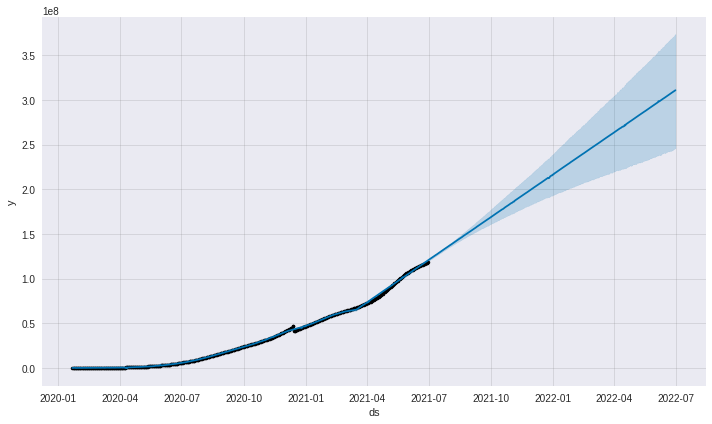

In [ ]:
recoveredCasesForecastPlot = recoveredCasesModel.plot(forecast)

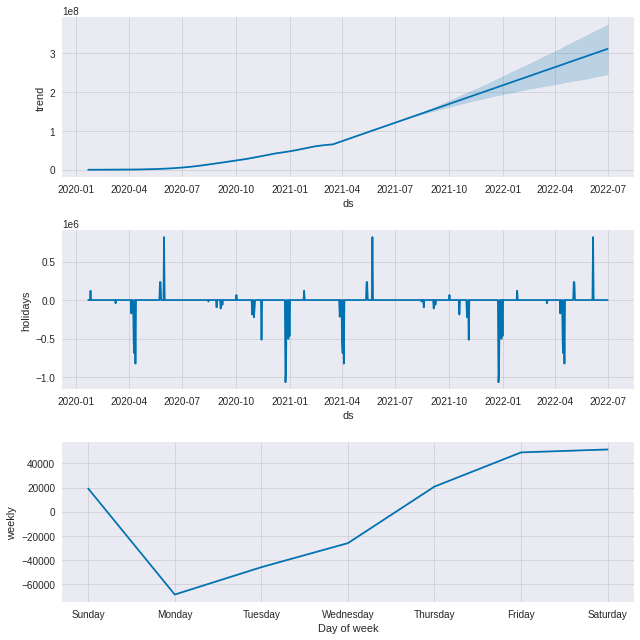

In [ ]:
forecastComponents = recoveredCasesModel.plot_components(forecast)

In [ ]:
plot_plotly(recoveredCasesModel, forecast)

In [ ]:
plot_components_plotly(recoveredCasesModel, forecast)

In [ ]:
df_cv_recovered = cross_validation(recoveredCasesModel, initial  = '180 days', period = '10 days', horizon = '30 days')

INFO:fbprophet:Making 32 forecasts with cutoffs between 2020-07-25 00:00:00 and 2021-05-31 00:00:00


  0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
df_p = performance_metrics(df_cv_recovered)
df_p.tail()

horizon           mse          rmse  ...      mape     mdape  coverage
23 26 days  2.161457e+13  4.649148e+06  ...  0.046743  0.028422  0.197917
24 27 days  2.263167e+13  4.757276e+06  ...  0.047710  0.029959  0.218750
25 28 days  2.366078e+13  4.864235e+06  ...  0.048669  0.032257  0.239583
26 29 days  2.474365e+13  4.974299e+06  ...  0.049707  0.032679  0.250000
27 30 days  2.595000e+13  5.094114e+06  ...  0.050941  0.032785  0.250000

[5 rows x 7 columns]

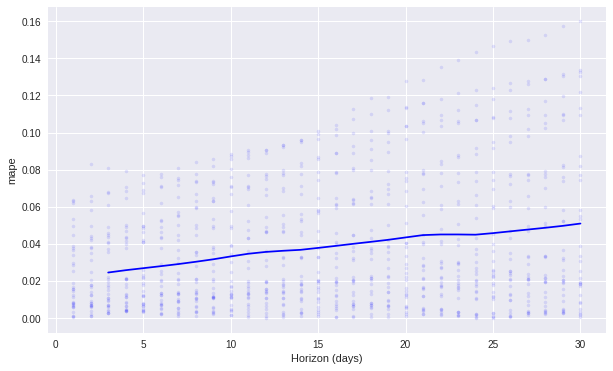

In [ ]:
fig = plot_cross_validation_metric(df_cv_recovered, metric='mape')

In [ ]:
MAPE_recovered = mean_absolute_percentage_error(df_cv_recovered.y, df_cv_recovered.yhat)
MAPE_recovered

3.869124010044532

# Utility to predict into a future date

In [ ]:
date = input("Enter the date in YYYY-MM-DD format:")

Enter the date in YYYY-MM-DD format:2021-11-18


In [ ]:
date

'2021-11-18'

In [ ]:
data = [[date]]
input_df = pd.DataFrame(data,columns=["ds"])

In [ ]:
input_df

ds
0  2021-11-18

In [ ]:
confirmedCasesForcast = confirmedCasesModel.predict(input_df)
deathCasesForcast = deathCasesModel.predict(input_df)
recoveredCasesForcast = recoveredCasesModel.predict(input_df)

In [ ]:
print(f'Predicted value of confirmed COVID cases on date: {date} is {math.floor(confirmedCasesForcast.iloc[0]["yhat"]):,} cases')
print(f'Predicted value of COVID deaths cases on date: {date} is {math.floor(deathCasesForcast.iloc[0]["yhat"]):,} cases')
print(f'Predicted value of recovered COVID cases on date: {date} is {math.floor(recoveredCasesForcast.iloc[0]["yhat"]):,} cases')

Predicted value of confirmed COVID cases on date: 2021-11-18 is 256,491,448 cases
Predicted value of COVID deaths cases on date: 2021-11-18 is 5,148,629 cases
Predicted value of recovered COVID cases on date: 2021-11-18 is 194,026,655 cases
